In [2]:
import requests
import pandas as pd
# from google.colab import files

def get_df(name):
  url = f'https://raw.githubusercontent.com/iGEM-UGM/iGEM-UGM-drylab/main/{name}'
  response = requests.get(url)
  with open(name, 'wb') as f:
      f.write(response.content)

  return(pd.read_csv(name))

def save_data(df, filepath):
  df.to_csv(filepath, index=False)
  # Download the file
  # files.download(filepath)

/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1.0-gathering-sequence

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay

In [ ]:
import pandas as pd
import time
def scrap_data_design(link, trial, driver):
  driver.get(f'{link}/{trial}')  # test client hints
  # Add a time delay to allow for page loading
  time.sleep(2)  # Adjust the delay as needed
  # dropdown sequences
  button = driver.find_elements(By.CSS_SELECTOR, "div.title")[1]
  button.click()
  showscreen(driver)

  #scrap the table of result
  tables = driver.find_elements(By.CLASS_NAME, "ui.table")
  table_data = []
  for tab in tables:
    rows = tab.find_elements(By.TAG_NAME, "tr")
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        row_data = [cell.text for cell in cells]
        table_data.append(row_data)

  df = pd.DataFrame(table_data, columns=["Domain_Strand", "Sequence"])
  return(df)

In [ ]:
def get_design_data(link):
  driver.get(link+'/0')
  # Find the menu element by its class name
  menu = driver.find_element(By.CLASS_NAME, "dropdown.icon")
  # Click the menu element
  menu.click()
  menu = driver.find_element(By.CSS_SELECTOR, "div.menu.transition.visible")
  # Find the items within the menu
  items = menu.find_elements(By.CLASS_NAME, "item")

  # Get the count of items
  item_count = len(items)
  print("Number of items:", item_count)

  # Create an empty DataFrame
  datas = pd.DataFrame()

  # Iterate over the items
  for i in range(item_count):
      # Scraping data using the scrap_data_design function
      data = scrap_data_design(link, i)

      n = len(data)  # The number of times to repeat the value
      result = [i+1] * n
      data['Trial'] = result
      # Append data to the datas DataFrame
      datas = datas.append(data, ignore_index=True)
  return(datas)

In [ ]:
from selenium_profiles.webdriver import Chrome
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen, show_html # virtual display

from webdriver_manager.chrome import ChromeDriverManager

chromedriver_path = ChromeDriverManager(version="90.0.4430.24").install()

profile = profiles.Windows() # or .Android
profile["cdp"]["cores"] = None # Chrome 90 doesn't allow emulating cores :(driver = mydriver.start(profile, uc_driver=False, executable_path=chromedriver_path)

mydriver = Chrome(profile, executable_path=chromedriver_path)

display = display()
display.start_display()

driver = mydriver.start()
driver = mydriver.start()
# Login
driver.get('https://www.nupack.org')

# Find the button by its CSS selector
button = driver.find_element(By.CSS_SELECTOR, "a.item[href='/auth/log-in']")

# Click the button
button.click()

# Find the input field by its class name
input_field = driver.find_element(By.CLASS_NAME, "ui input")

# Clear any existing text in the input field (optional)
input_field.clear()

# Enter the desired email address
email_address = mail #add your email here
input_field.send_keys(email_address)
input_element = driver.find_element(By.CLASS_NAME, "ui.fluid.icon.input")

# Find the input field within the parent element
password_field = input_element.find_element(By.TAG_NAME, "input")
password_field.send_keys(password) #add your password here

eye_icon = driver.find_element(By.CSS_SELECTOR, ".eye.fitted.link.icon")
eye_icon.click()
# Find the button
button = driver.find_element(By.CLASS_NAME, "ui.button.orange")
button.click()

# start scrapping
link = 'https://www.nupack.org/design/results/a10996f7-3a7c-49eb-ba3c-bf682effc883'

output_sequence = get_design_data(link)

# Close the browser
driver.quit()

# save link into csv data downloaded automatically
code = link.split('/')[-1]
name = f"table_data_{code}.csv"
save_data(output_sequence, name)

NameError: ignored

# 2.0-parameter-gathering-nupack-analysis

In [17]:
import nupack
from nupack import *
def get_rbs_index(c):
    a = ''
    for i in c.strands:
        a += str(i)
    rbs = "UAGAGGAGAUG"
    index = a.find(rbs)
    return(int(index))

def calculate_gc_percentage(string):
    gc_count = string.count("G") + string.count("C")
    total_count = len(string)
    gc_percentage = (gc_count / total_count) * 100

    return(gc_percentage)

import re
import numpy as np
def check_illegal_sites(sequence, enzymes):
    illegal_sites = 0
    for enzyme, site in enzymes.items():
        matches = re.finditer(site, sequence)
        for match in matches:
            illegal_sites += 1

    return(illegal_sites)

def get_index(text):
    periods = []
    parentheses = []

    for match in re.finditer(r'\.|[()]', text):
        if match.group() == '.':
            periods.append(match.start())
        elif match.group() == '(' or match.group() == ')':
            parentheses.append(match.start())
    return periods, parentheses

def get_prob(target, matrix):
    # target = str(tube_results.complexes[Complex([b, a, c], name='(b+a+c)')].mfe[0][0]).replace("+", "")
    target = target.replace('+', '')
    # matrix = pairs(Complex([b, a, c], name='(b+a+c)'), model=model1).to_array()
    diagonal_elements = np.diag(matrix)
    non_diagonal_array = matrix - diagonal_elements
    prob = []
    for i in range(len(target)):
        if target[i] == ')' or target[i] == '(':
            prob.append(np.max(non_diagonal_array[i]))
        elif target[i] == '.':
            prob.append(diagonal_elements[i])
        else:
            continue
    return prob

def get_probability_onoff(index, data):
    prob = []
    for i in index:
        prob.append(data[i])
    return prob

def on_off(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = []
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    return(prob_on, prob_off)

def on_off_level(text, data):
    prob_on, prob_off = on_off(text, data)
    on_level = sum(prob_on)/len(text)
    off_level = sum(prob_off)/len(text)
    return(on_level, off_level)

def stats(lists):
    try:
        mean = sum(lists) / len(lists)
        squared_differences = [(x - mean)**2 for x in lists]
        variance = sum(squared_differences) / len(lists)
        standard_deviation = variance**0.5
        sum_res = sum(lists)

        return(mean, sum_res, standard_deviation)
    except ZeroDivisionError:
        print("Error: Division by zero.")
        return 0, 0, 0

def get_analyze(t, df):
    seq = str.upper((df.loc[(df['Trial'] == t) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
    mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
    mir92a = 'UAUUGCACUUGUCCCGGCCUGU'


    # define illegal sites enzymes
    '''
    Ecori: GAATTC GAAUUC
    Xbai: TCTAGA UCUAGA
    Spei: ACTAGT ACUAGU
    Psti: CTGCAG CUGCAG
    noti:GCGGCCGC
    '''
    enzymes = {
      "EcoRI": "GAATTC",
      "EcoRI2": "GAAUUC",
      "XbaI": "TCTAGA",
      "XbaI2": "UCUAGA",
      "SpeI": "ACTAGT",
      "SpeI2": "ACUAGU",
      "PstI": "CTGCAG",
      "PstI2": "CUGCAG",
      "NotI": "GCGGCCGC"
    }
    # analysis job

    # specify strands
    a = Strand(seq, name='a')
    b = Strand(mir21, name='b')
    c = Strand(mir92a, name='c')

    # specify tubes
    t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
    # t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

    # analyze tubes
    model1 = Model()
    tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])

    # Split the ASCII result into lines
    lines = str(tube_results).split('\n')

    # Extract the column names
    columns = lines[0].split()

    # Create an empty list to store the data rows
    concen_data = []

    # Iterate over the lines starting from the second line
    for line in lines[1:]:
        # Split the line into individual values
        values = line.split()
        # Append the values as a row to the data list
        concen_data.append(values)

    # Iterate through the list and find the index containing 'Concentration'
    index = None
    for i, sublist in enumerate(concen_data):
        if 'Concentration' in sublist:
            index = i
            break

    new_data = concen_data[index+1:]
    # Create the dataframe
    concen = pd.DataFrame(new_data[1:], columns=new_data[0][:-1], )

    #  data get from each sequence
    c0 = Complex([a], name='(a)')
    c1 = Complex([a, c, b], name='(a+c+b)')
    c2 = Complex([a, b, c], name='(a+b+c)')
    c3 = Complex([a, b], name='(a+b)')
    c4 = Complex([a, c], name='(a+c)')
    c5 = Complex([a, a], name='(a+a)')

    data = dict ()
    data['sequence'] = seq
    for c in [c0, c1, c2, c3, c4, c5]:
        data[str(c.name) + '_mfe'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_target']  = str(tube_results.complexes[c].mfe[0][0])
        data[str(c.name) + '_pfunc'] =  tube_results.complexes[c].pfunc
        data[str(c.name) + '_free_energy'] =  tube_results.complexes[c].free_energy
        data[str(c.name) + '_ensemble_size'] =  tube_results.complexes[c].ensemble_size
        data[str(c.name) + '_mfe_energy'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_mfe_stack_energy'] =  tube_results.complexes[c].mfe[0][2]
        data[str(c.name) + '_t1'] = concen.loc[concen['Complex'] == str(c.name), 't1'].values[0]
        data[str(c.name) + '_t1_rank'] = concen.index[concen['Complex'] == str(c.name)][0]
        data['on_' + str(c.name)] = len(re.findall(r'\.', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        print(get_rbs_index(c))
        data['off_'+ str(c.name)] = len(re.findall(r'[()]', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        data['prob_matrix_'+ str(c.name)] = pairs(c, model=model1).to_array()

        data['prob_' + str(c.name)] = get_prob(str(tube_results.complexes[c].mfe[0][0]).replace("+", ""), pairs(c, model=model1).to_array())
        data['prob_on_' + str(c.name)], data['prob_off_' + str(c.name)] = on_off(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_level_' + str(c.name)], data['off_level_' + str(c.name)] = on_off_level(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_mean_' + str(c.name)], data['on_sum_' + str(c.name)], data['on_stdev_' + str(c.name)] = stats(data['prob_on_' + str(c.name)])
        data['off_mean_' + str(c.name)], data['off_sum_' + str(c.name)], data['off_stdev_' + str(c.name)] = stats(data['prob_off_' + str(c.name)])

    data['defect'] = defect(strands=[seq], structure=data['(a)_target'], model=model1)
    data['structure_prob'] = structure_probability(strands=[seq], structure=data['(a)_target'], model=model1)
    # data['prob_matrix'] = pairs(strands=[seq], model=model1).to_array()
    # data['prob_diagonal'] = np.diagonal(pairs(strands=[seq], model=model1).to_array())
    data['gc_content'] = calculate_gc_percentage(seq)
    data['illegal_count'] = check_illegal_sites(seq, enzymes)
    return(data)

In [24]:
import pandas as pd

df = pd.read_csv('./table_data_a10996f7-3a7c-49eb-ba3c-bf682effc883.csv')
datas = []
for i in df['Trial'].unique().tolist():
    datas.append(get_analyze(i, df))
result = pd.DataFrame(datas)
result.head(20)
result.info()

135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
Error: Division by zero.
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 143 entries, sequence to illegal_count
dtypes: float64(75), int64(19), object(49)
memory usage: 11.3+ KB


In [118]:
def get_on_off_each_seq(i, result):
  on_off_ratio = []
  on_off_minus = []
  for j in range(len(result)):
          # print(result['on_level_' + str(i)][j])
          # print(result['off_level_' + str(i)][j])
          ratio = result['on_level_' + str(i)][j] / result['off_level_' + str(i)][j]
          minus = result['on_level_' + str(i)][j] - result['off_level_' + str(i)][j]
        #   print(minus)
          on_off_ratio.append(ratio)
          on_off_minus.append(minus)
  return(on_off_ratio, on_off_minus)

In [135]:
def get_metrics(cols_complex, result):
  ratio_avg_list = []
  minus_avg_list = []
  on_level_avg_list = []
  off_level_avg_list = []
  w_ratio_avg_list = []
  w_minus_avg_list = []
  w_on_level_avg_list = []
  w_off_level_avg_list = []
  for j in range(len(result)):
    #   print(j)
      ratio_avg = 0
      minus_avg = 0
      on_level_avg = 0
      off_level_avg = 0
      weighted_on_level_avg = 0
      weighted_off_level_avg = 0
      weighted_minus_avg = 0
      weighted_ratio_avg = 0
      
      for i in cols_complex:
          # complex regression: ['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)']
          ratio_avg += result['on_off_ratio_' + str(i)][j]
          minus_avg += result['on_off_minus_' + str(i)][j]
          on_level_avg += result['on_level_' + str(i)][j]
          off_level_avg += result['off_level_' + str(i)][j]
          weighted_on_level_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_level_' + str(i)][j]
          weighted_off_level_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['off_level_' + str(i)][j]
          weighted_ratio_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_off_ratio_' + str(i)][j]
          weighted_minus_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_off_minus_' + str(i)][j]
        #   print(i)
        #   print(result['on_off_ratio_' + str(i)][j])
    #   print(j)
        #   print(minus_avg, weighted_minus_avg)
      ratio_avg_list.append(ratio_avg/len(cols_complex))
      minus_avg_list.append(minus_avg/len(cols_complex))
      on_level_avg_list.append(on_level_avg/len(cols_complex))
      off_level_avg_list.append(off_level_avg/len(cols_complex))
    #   print(j)
      #weighted
      w_ratio_avg_list.append(weighted_ratio_avg/len(cols_complex))
      w_minus_avg_list.append(weighted_minus_avg/len(cols_complex))
      w_on_level_avg_list.append(weighted_on_level_avg/len(cols_complex))
      w_off_level_avg_list.append(weighted_off_level_avg/len(cols_complex))
    #   print(j)
  return(ratio_avg_list, minus_avg_list, on_level_avg_list, off_level_avg_list,
             w_ratio_avg_list, w_minus_avg_list, w_on_level_avg_list, w_off_level_avg_list)

In [22]:
def get_complex(df):
  cols_complex = []
  for i in df.columns[df.columns.str.startswith('on_level_')].tolist()[1:-1]:
    cols_complex.append(i.split('on_level_')[1])
  print(cols_complex)
  return(cols_complex)

In [39]:
result.columns[-40:]

Index(['off_mean_(a+c)', 'off_sum_(a+c)', 'off_stdev_(a+c)', '(a+a)_mfe',
       '(a+a)_target', '(a+a)_pfunc', '(a+a)_free_energy',
       '(a+a)_ensemble_size', '(a+a)_mfe_energy', '(a+a)_mfe_stack_energy',
       '(a+a)_t1', '(a+a)_t1_rank', 'on_(a+a)', 'off_(a+a)',
       'prob_matrix_(a+a)', 'prob_(a+a)', 'prob_on_(a+a)', 'prob_off_(a+a)',
       'on_level_(a+a)', 'off_level_(a+a)', 'on_mean_(a+a)', 'on_sum_(a+a)',
       'on_stdev_(a+a)', 'off_mean_(a+a)', 'off_sum_(a+a)', 'off_stdev_(a+a)',
       'defect', 'structure_prob', 'gc_content', 'illegal_count',
       'on_off_ratio_10', 'on_off_minus_10', 'on_off_ratio_(a+c+b)',
       'on_off_minus_(a+c+b)', 'on_off_ratio_(a+b+c)', 'on_off_minus_(a+b+c)',
       'on_off_ratio_(a+b)', 'on_off_minus_(a+b)', 'on_off_ratio_(a+c)',
       'on_off_minus_(a+c)'],
      dtype='object')

In [38]:
cols_complex

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)']

In [136]:
cols_complex = get_complex(result)
for i in cols_complex:
      # print(i)
      result['on_off_ratio_' + str(i)], result['on_off_minus_' + str(i)] = get_on_off_each_seq(i, result)
result['on_off_ratio_avg'], result['on_off_minus_avg'], result['on_level_avg'], result['off_level_avg'], result['weighted_on_off_ratio_avg'], result['weighted_on_off_minus_avg'], result['weighted_on_level_avg'], result['weighted_off_level_avg'] = get_metrics(cols_complex, result)
save_data(result, './nupack_params.csv')

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)', '(a+a)']


/var/folders/kd/60d16wd1309b3n63310hvnw00000gn/T/ipykernel_3126/221922470.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = result['on_level_' + str(i)][j] / result['off_level_' + str(i)][j]


In [138]:
metrics = ['on_off_ratio_avg', 'on_off_minus_avg', 'on_level_avg', 'off_level_avg', 
           'weighted_on_off_ratio_avg', 'weighted_on_off_minus_avg', 'weighted_on_level_avg', 
           'weighted_off_level_avg']
# print(metrics)
for i in metrics:
    print(i)
    print(result[i].unique())

on_off_ratio_avg
[1.96433608 3.41983607 2.35241734 0.81103532 2.71621296        inf
 1.98671381 1.23801211 0.82520701 1.28794273]
on_off_minus_avg
[ 0.15630131  0.08364348  0.09562134 -0.26356006  0.25968545 -0.44165774
  0.08397206 -0.0587191  -0.15745472 -0.05435107]
on_level_avg
[0.54039907 0.51650759 0.52133691 0.32483364 0.59065635 0.23305706
 0.4811781  0.39866266 0.37933304 0.38825723]
off_level_avg
[0.38409776 0.43286411 0.42571557 0.5883937  0.3309709  0.6747148
 0.39720604 0.45738176 0.53678776 0.4426083 ]
weighted_on_off_ratio_avg
[0.9855851  1.88157993 1.3371695  0.47148008 0.93656513        inf
 1.04591467 0.76797134 0.33480688 0.4183822 ]
weighted_on_off_minus_avg
[ 0.13812937  0.15713045  0.15486971  0.01940907  0.126509   -0.02090457
  0.11565757  0.08896148  0.00488967  0.03348451]
weighted_on_level_avg
[0.22636683 0.22107316 0.23322679 0.1639924  0.20008778 0.03509909
 0.2010187  0.16781222 0.13728367 0.14489302]
weighted_off_level_avg
[0.08823746 0.06394271 0.0783570

# 2.1-parameter-gathering-mfe

In [ ]:
!pip install ViennaRNA

In [7]:
def mfe_segment(data):
  list_domain = ['ABS',
                  'ABS_',
                  'ATS',
                  'Complementstart',
                  'DBSCom',
                  'Loop',
                  'RBS',
                  'StartCodon',
                  '_DBS',
                  'loopCom',
                  'loopRBS',
                  'miR21bottomseal1',
                  'miR21bottomseal2',
                  'miR21topseal',
                  'miR92bottomseal1',
                  'miR92bottomseal2',
                  'miR92topseal',
                  'toeholdmiR92',
                  'toeholdmir21']
  list_segment = [['ABS', 'Complementstart', 'ABS_', 'Loop', 'ATS', 'loopRBS', 'miR21bottomseal1'],
                  ['toeholdmir21', 'miR21topseal', 'miR21bottomseal2', 'miR92bottomseal1', 'toeholdmiR92', 'miR92topseal'],
                  ['miR92bottomseal2', 'RBS', 'loopCom', '_DBS', 'StartCodon', 'DBSCom']]
  res = dict()
  list_name = ['ABS-miR21bottomseal1', 'toeholdmir21-miR92topseal', 'miR92bottomseal2-end']
  for j, name in zip(list_segment, list_name):
    # get The RNA sequence segment
    seq = ''
    for i in j:
      # print(i)
      dom = data.loc[data['Domain_Strand'] == str(i), 'Sequence'].values[0]
      seq += dom
    seq = seq.lower()
    print(seq)
    # compute minimum free energy (MFE) and corresponding structure
    (ss, mfe) = RNA.fold(seq)
    res['mfe_' + name] = mfe
  return(res)

In [ ]:
import RNA
import pandas as pd
url='https://drive.google.com/file/d/1ulrMr39Uy2RaSLEaGBGOVwtSGhN11gPS/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url)
datas = []
for i in df['Trial'].unique().tolist():
    datas.append(mfe_segment(df[df['Trial']==i]))

# 3.0-modelling

In [139]:
df1 = pd.read_csv('nupack_params.csv')
df2 = get_df('mfe_data_10trial_revisi.csv')
raw = get_df('table_data_a10996f7-3a7c-49eb-ba3c-bf682effc883.csv')
df = pd.concat([df1, df2], axis=1)
df.head()

,sequence,(a)_mfe,(a)_target,(a)_pfunc,(a)_free_energy,(a)_ensemble_size,(a)_mfe_energy,(a)_mfe_stack_energy,(a)_t1,(a)_t1_rank,...,off_level_avg,weighted_on_off_ratio_avg,weighted_on_off_minus_avg,weighted_on_level_avg,weighted_off_level_avg,on_off_ratio_(a+a),on_off_minus_(a+a),mfe_ABS-miR21bottomseal1,mfe_toeholdmir21-miR92topseal,mfe_miR92bottomseal2-end
0,GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUUUCAACAUCAG...,-36.106400,(((((((((((.(((((((((((((((((((((((((((.....((...,6110614266210913442312795050,-39.432095,1811761081325936349282696344000000000000000000...,-36.106400,-36.106400,2.096000e-15,4,...,0.384098,0.985585,0.138129,0.226367,0.088237,0.153888,-0.579841,0.0,-11.6,-2.2
1,GGGGCCAUUUUUUAUUUUUUUUUUAUUCUAUCAGUUUCAACAUCAG...,-49.285297,((((((((((((((((((((((.((((((((((((.(((.....((...,3.923746057261015788993891901E+36,-51.931256,5272249390332415439181367084000000000000000000000,-49.285297,-49.285297,7.436000e-12,2,...,0.432864,1.881580,0.157130,0.221073,0.063943,0.022355,-0.904480,0.0,-11.6,-4.3
2,GGGGCCAUUUUAUAUUUUUUUUCACAACACAAAUCAUCAACAUCAG...,-47.085293,(((((((((((.((((((((((.((((((((((((.(((.....((...,8.725384007099046057753729305E+34,-49.585552,696481829942754344863053098300000000000000000000,-47.085293,-47.085293,1.767000e-11,3,...,0.425716,1.337169,0.154870,0.233227,0.078357,0.089808,-0.772259,0.0,-9.4,-1.7
3,GGGGUCAUAUUACAUUUUUUUAACAAACAGCAGGGGUCAACAUCAG...,-48.343090,((((((((((..(((((((((..((((((((((((.(((.....((...,1.457252671475590043582496214E+35,-49.901663,9869658106864042090449239982000000000000000000000,-48.343090,-48.343090,6.583000e-15,5,...,0.588394,0.471480,0.019409,0.163992,0.144583,0.228536,-0.590541,0.0,-16.1,-6.9
4,GAAGCCAUCUACCAUUUUUUCCUACUUAUAUCCAACUCAACAUCAG...,-50.543095,((((((((((.((((((((((..((((((((((((.(((.....((...,9.390109725107983126823168796E+37,-53.888195,292565878506251484864541410500000000000000000000,-50.543095,-50.543095,4.511000e-11,2,...,0.330971,0.936565,0.126509,0.200088,0.073579,0.126481,-0.705112,0.0,-11.5,-2.2


In [140]:
# get columns that has variation of complexes
cols_complex = []
for i in df.columns[df.columns.str.startswith('on_level_')].tolist()[1:-1]:
  cols_complex.append(i.split('on_level_')[1])

cols_complex

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)', '(a+a)']

In [130]:
# get the list of columns to get into regression
_param = ['_mfe',
          '_pfunc',
          '_free_energy',
          '_ensemble_size',
          '_mfe_energy',
          '_mfe_stack_energy',
          '_t1',
          '_t1_rank']
param_  = ['on_level_',
            'off_level_',
            'on_mean_',
            'on_sum_',
            'on_stdev_',
            'off_mean_',
            'off_sum_',
            'off_stdev_']
param = ['mfe_ABS-miR21bottomseal1', 'mfe_toeholdmir21-miR92topseal',
          'mfe_miR92bottomseal2-end',
          'gc_ABS-miR21bottomseal1', 'gc_toeholdmir21-miR92topseal',
          'gc_miR92bottomseal2-end',
          'gc_content', 'structure_prob', 'defect']
import numpy as np

def prepro(df, mode = 'infinity'):
  # change datatype to float
  df['(a)_pfunc'] = df['(a)_pfunc'].astype(float)
  df['(a)_ensemble_size'] = df['(a)_ensemble_size'].astype(float)
  df['(a+c+b)_ensemble_size'] = df['(a+c+b)_ensemble_size'].astype(float)
  df['(a+b+c)_ensemble_size'] = df['(a+b+c)_ensemble_size'].astype(float)
  df['(a+b)_ensemble_size'] = df['(a+b)_ensemble_size'].astype(float)
  df['(a+c)_ensemble_size'] = df['(a+c)_ensemble_size'].astype(float)
  df['(a+a)_ensemble_size'] = df['(a+a)_ensemble_size'].astype(float)
  df_non_inf = pd.DataFrame()
  if mode == 'infinity':
    # Check which rows contain infinity values
    rows_with_inf = df.isin([np.inf]).any(axis=1)

    # Drop rows with infinity values
    df_non_inf = df.drop(index = pd.Series(rows_with_inf)[pd.Series(rows_with_inf)].index[0])
  return(df, df_non_inf)

def get_param(df, _param, cols_complex):

  params_all = []
  for i in cols_complex:
    for j in _param:
      params_all.append(str(i+j))
    # for k in param_:
    #   params_all.append(str(k+i))
  params_all.extend(param)
  return(params_all)
# print(len(cols_complex)*(len(_param))+len(param))
# len(params_all)

In [131]:
def gc_segment(data):
  list_domain = ['ABS',
                  'ABS_',
                  'ATS',
                  'Complementstart',
                  'DBSCom',
                  'Loop',
                  'RBS',
                  'StartCodon',
                  '_DBS',
                  'loopCom',
                  'loopRBS',
                  'miR21bottomseal1',
                  'miR21bottomseal2',
                  'miR21topseal',
                  'miR92bottomseal1',
                  'miR92bottomseal2',
                  'miR92topseal',
                  'toeholdmiR92',
                  'toeholdmir21']
  list_segment = [['ABS', 'Complementstart', 'ABS_', 'Loop', 'ATS', 'loopRBS', 'miR21bottomseal1'],
                  ['toeholdmir21', 'miR21topseal', 'miR21bottomseal2', 'miR92bottomseal1', 'toeholdmiR92', 'miR92topseal'],
                  ['miR92bottomseal2', 'RBS', 'loopCom', '_DBS', 'StartCodon', 'DBSCom']]
  res = dict()
  list_name = ['ABS-miR21bottomseal1', 'toeholdmir21-miR92topseal', 'miR92bottomseal2-end']
  for j, name in zip(list_segment, list_name):
    # get The RNA sequence segment
    seq = ''
    for i in j:
      # print(i)
      dom = data.loc[data['Domain_Strand'] == str(i), 'Sequence'].values[0]
      seq += dom
    seq = seq.upper()
  
    print(seq)
    # compute minimum free energy (MFE) and corresponding structure
    gc_seg = calculate_gc_percentage(seq)
    res['gc_' + name] = gc_seg
  return(res)

In [141]:
datas = []
for i in raw['Trial'].unique().tolist():
    datas.append(gc_segment(raw[raw['Trial']==i]))
datas

GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUU
UCAACAUCAGUCUGAUAAGCUAAAAACUGAGAUAGAAUGUAAUUUUAUUUUUUGUCACAGGCCGGGACAAGUGCAAUAAGAUAUGU
AAUAAAAAAUGAGUAGAGGAGAUGCGAGAUGGCUUC
GGGGCCAUUUUUUAUUUUUUUUUUAUUCUAUCAGUU
UCAACAUCAGUCUGAUAAGCUAAAACAUGAUAUUGGUAGAAUAUUUUCCACUGGUAACAGGCCGGGACAAGUGCAAUAAAUAAUGU
AGCCAGUGGAAAAUAGAGGAGAUGGAAAAUGGCUUC
GGGGCCAUUUUAUAUUUUUUUUCACAACACAAAUCA
UCAACAUCAGUCUGAUAAGCUAAAAAAUGAAGGUUUGUGUUGUUUAAUUCGGAUUUACAGGCCGGGACAAGUGCAAUAAAAAAUGU
AAAUCCGAAUUAAUAGAGGAGAUGAAAAAUGGCUUC
GGGGUCAUAUUACAUUUUUUUAACAAACAGCAGGGG
UCAACAUCAGUCUGAUAAGCUAACAUAUGAGUUCUGUUGUUUGCAGAUUACGGGGCACAGGCCGGGACAAGUGCAAUAAAAAAUGU
ACCUCGUAAUUUGUAGAGGAGAUGGCGUAUGGCUUC
GAAGCCAUCUACCAUUUUUUCCUACUUAUAUCCAAC
UCAACAUCAGUCUGAUAAGCUACACAAUGACUUGGAUAUGAGUUUUCACAUUUAAGACAGGCCGGGACAAGUGCAAUAAAGGGUGU
GUUAAAUGUGAAGUAGAGGAGAUGCGGGAUGGCUUC
GAAGCCAUCUCCCAUCUCCUCUAAAGUCAAUAAUAA
UCAACAUCAGUCUGAUAAGCUAUUAAAUGAAUGUUGUUGGCUUACGCUUGCAAUAUACAGGCCGGGACAAGUGCAAUAACCGGUGU
AUAUUGUGAGCGUUAGAGGAGAUGGUAGAUGGCUUC
GAGGUCAUUAUACAUUUUUUCCCAUAAACAAAAA

[{'gc_ABS-miR21bottomseal1': 22.22222222222222,
  'gc_toeholdmir21-miR92topseal': 33.72093023255814,
  'gc_miR92bottomseal2-end': 38.88888888888889},
 {'gc_ABS-miR21bottomseal1': 25.0,
  'gc_toeholdmir21-miR92topseal': 36.04651162790697,
  'gc_miR92bottomseal2-end': 44.44444444444444},
 {'gc_ABS-miR21bottomseal1': 30.555555555555557,
  'gc_toeholdmir21-miR92topseal': 34.883720930232556,
  'gc_miR92bottomseal2-end': 33.33333333333333},
 {'gc_ABS-miR21bottomseal1': 38.88888888888889,
  'gc_toeholdmir21-miR92topseal': 41.86046511627907,
  'gc_miR92bottomseal2-end': 47.22222222222222},
 {'gc_ABS-miR21bottomseal1': 36.11111111111111,
  'gc_toeholdmir21-miR92topseal': 40.69767441860465,
  'gc_miR92bottomseal2-end': 47.22222222222222},
 {'gc_ABS-miR21bottomseal1': 38.88888888888889,
  'gc_toeholdmir21-miR92topseal': 41.86046511627907,
  'gc_miR92bottomseal2-end': 44.44444444444444},
 {'gc_ABS-miR21bottomseal1': 25.0,
  'gc_toeholdmir21-miR92topseal': 36.04651162790697,
  'gc_miR92bottomseal2-

In [142]:
df = pd.concat([df, pd.DataFrame(datas)], axis=1)
df.head()

,sequence,(a)_mfe,(a)_target,(a)_pfunc,(a)_free_energy,(a)_ensemble_size,(a)_mfe_energy,(a)_mfe_stack_energy,(a)_t1,(a)_t1_rank,...,weighted_on_level_avg,weighted_off_level_avg,on_off_ratio_(a+a),on_off_minus_(a+a),mfe_ABS-miR21bottomseal1,mfe_toeholdmir21-miR92topseal,mfe_miR92bottomseal2-end,gc_ABS-miR21bottomseal1,gc_toeholdmir21-miR92topseal,gc_miR92bottomseal2-end
0,GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUUUCAACAUCAG...,-36.106400,(((((((((((.(((((((((((((((((((((((((((.....((...,6110614266210913442312795050,-39.432095,1811761081325936349282696344000000000000000000...,-36.106400,-36.106400,2.096000e-15,4,...,0.226367,0.088237,0.153888,-0.579841,0.0,-11.6,-2.2,22.222222,33.720930,38.888889
1,GGGGCCAUUUUUUAUUUUUUUUUUAUUCUAUCAGUUUCAACAUCAG...,-49.285297,((((((((((((((((((((((.((((((((((((.(((.....((...,3.923746057261015788993891901E+36,-51.931256,5272249390332415439181367084000000000000000000000,-49.285297,-49.285297,7.436000e-12,2,...,0.221073,0.063943,0.022355,-0.904480,0.0,-11.6,-4.3,25.000000,36.046512,44.444444
2,GGGGCCAUUUUAUAUUUUUUUUCACAACACAAAUCAUCAACAUCAG...,-47.085293,(((((((((((.((((((((((.((((((((((((.(((.....((...,8.725384007099046057753729305E+34,-49.585552,696481829942754344863053098300000000000000000000,-47.085293,-47.085293,1.767000e-11,3,...,0.233227,0.078357,0.089808,-0.772259,0.0,-9.4,-1.7,30.555556,34.883721,33.333333
3,GGGGUCAUAUUACAUUUUUUUAACAAACAGCAGGGGUCAACAUCAG...,-48.343090,((((((((((..(((((((((..((((((((((((.(((.....((...,1.457252671475590043582496214E+35,-49.901663,9869658106864042090449239982000000000000000000000,-48.343090,-48.343090,6.583000e-15,5,...,0.163992,0.144583,0.228536,-0.590541,0.0,-16.1,-6.9,38.888889,41.860465,47.222222
4,GAAGCCAUCUACCAUUUUUUCCUACUUAUAUCCAACUCAACAUCAG...,-50.543095,((((((((((.((((((((((..((((((((((((.(((.....((...,9.390109725107983126823168796E+37,-53.888195,292565878506251484864541410500000000000000000000,-50.543095,-50.543095,4.511000e-11,2,...,0.200088,0.073579,0.126481,-0.705112,0.0,-11.5,-2.2,36.111111,40.697674,47.222222


In [12]:
# modelling
def get_mse_rmse(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  return mse, rmse

def linreg(X, y):
  sc_X = StandardScaler()
  X = sc_X.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Build linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Make predictions on testing set
  y_pred = model.predict(X_test)

  mse, rmse = get_mse_rmse(y_test, y_pred)
  # Get the R-squared value
  r2 = r2_score(y_test, y_pred)
  print('R^2:', r2)
  print('MSE:', mse)
  print('RMSE:', rmse)
  return(model)

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
# Check which rows contain infinity values
rows_with_inf = df.isin([np.inf]).any(axis=1)

# Drop rows with infinity values
df_non_inf = df.drop(index = pd.Series(rows_with_inf)[pd.Series(rows_with_inf)].index[0])
params_all = get_param(df, _param, cols_complex)
print(params_all)

['(a+c+b)_mfe', '(a+c+b)_pfunc', '(a+c+b)_free_energy', '(a+c+b)_ensemble_size', '(a+c+b)_mfe_energy', '(a+c+b)_mfe_stack_energy', '(a+c+b)_t1', '(a+c+b)_t1_rank', '(a+b+c)_mfe', '(a+b+c)_pfunc', '(a+b+c)_free_energy', '(a+b+c)_ensemble_size', '(a+b+c)_mfe_energy', '(a+b+c)_mfe_stack_energy', '(a+b+c)_t1', '(a+b+c)_t1_rank', '(a+b)_mfe', '(a+b)_pfunc', '(a+b)_free_energy', '(a+b)_ensemble_size', '(a+b)_mfe_energy', '(a+b)_mfe_stack_energy', '(a+b)_t1', '(a+b)_t1_rank', '(a+c)_mfe', '(a+c)_pfunc', '(a+c)_free_energy', '(a+c)_ensemble_size', '(a+c)_mfe_energy', '(a+c)_mfe_stack_energy', '(a+c)_t1', '(a+c)_t1_rank', '(a+a)_mfe', '(a+a)_pfunc', '(a+a)_free_energy', '(a+a)_ensemble_size', '(a+a)_mfe_energy', '(a+a)_mfe_stack_energy', '(a+a)_t1', '(a+a)_t1_rank', 'mfe_ABS-miR21bottomseal1', 'mfe_toeholdmir21-miR92topseal', 'mfe_miR92bottomseal2-end', 'gc_ABS-miR21bottomseal1', 'gc_toeholdmir21-miR92topseal', 'gc_miR92bottomseal2-end', 'gc_content', 'structure_prob', 'defect']


In [13]:
def display_metrics(sf, sc):
  display(pd.DataFrame({
      'Features': sf,
      'Coefficients': sc,
      'Absolute Coefficients': np.abs(sc)
  }).sort_values(by='Absolute Coefficients', ascending=False))

def metrics(model, params_all):
  # Get the coefficients of the linear regression model
  coefficients = model.coef_

  # Sort the coefficients in descending order
  sorted_indices = np.argsort(coefficients)[::-1].tolist()
  sorted_coefficients = coefficients[sorted_indices]
  sorted_features = sorted(params_all, key=lambda x: sorted_indices.index(params_all.index(x)))

  # Create a bar plot of feature importances
  plt.bar(range(len(sorted_features)), sorted_coefficients)
  plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
  plt.xlabel('Features')
  plt.ylabel('Coefficient')
  plt.title('Feature Coefficients')
  plt.show()
  return(sorted_features, sorted_coefficients)

In [143]:
metrics = ['on_off_ratio_avg', 'on_off_minus_avg', 'on_level_avg', 'off_level_avg', 
           'weighted_on_off_ratio_avg', 'weighted_on_off_minus_avg', 'weighted_on_level_avg', 
           'weighted_off_level_avg']
# print(metrics)
for i in metrics:
    print(i)
    print(df[i].unique())

on_off_ratio_avg
[1.96433608 3.41983607 2.35241734 0.81103532 2.71621296        inf
 1.98671381 1.23801211 0.82520701 1.28794273]
on_off_minus_avg
[ 0.15630131  0.08364348  0.09562134 -0.26356006  0.25968545 -0.44165774
  0.08397206 -0.0587191  -0.15745472 -0.05435107]
on_level_avg
[0.54039907 0.51650759 0.52133691 0.32483364 0.59065635 0.23305706
 0.4811781  0.39866266 0.37933304 0.38825723]
off_level_avg
[0.38409776 0.43286411 0.42571557 0.5883937  0.3309709  0.6747148
 0.39720604 0.45738176 0.53678776 0.4426083 ]
weighted_on_off_ratio_avg
[0.9855851  1.88157993 1.3371695  0.47148008 0.93656513        inf
 1.04591467 0.76797134 0.33480688 0.4183822 ]
weighted_on_off_minus_avg
[ 0.13812937  0.15713045  0.15486971  0.01940907  0.126509   -0.02090457
  0.11565757  0.08896148  0.00488967  0.03348451]
weighted_on_level_avg
[0.22636683 0.22107316 0.23322679 0.1639924  0.20008778 0.03509909
 0.2010187  0.16781222 0.13728367 0.14489302]
weighted_off_level_avg
[0.08823746 0.06394271 0.0783570

In [144]:
df.to_csv('final.csv')

* ON OFF Ratio
* ON level
* OFF level
* ON OFF ratio a-c-b
* ON OFF Ratio weighted
* ON level weighted
* OFF level weighted

R^2: -0.04609249227698564
MSE: 2.824045872769791
RMSE: 1.6804897716944875


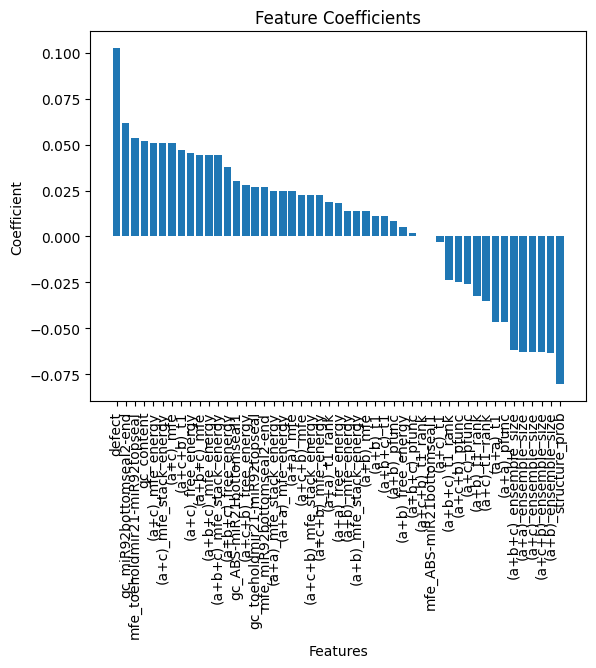

,Features,Coefficients,Absolute Coefficients
0,defect,0.102503,0.102503
48,structure_prob,-0.080431,0.080431
47,(a+b)_ensemble_size,-0.063433,0.063433
46,(a+c+b)_ensemble_size,-0.063005,0.063005
45,(a+c)_ensemble_size,-0.063003,0.063003
44,(a+a)_ensemble_size,-0.062659,0.062659
43,(a+b+c)_ensemble_size,-0.061675,0.061675
1,gc_miR92bottomseal2-end,0.061615,0.061615
2,mfe_toeholdmir21-miR92topseal,0.053383,0.053383
3,gc_content,0.051768,0.051768


In [105]:
# on off ratio
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.46306867725272594
MSE: 0.015437160882097395
RMSE: 0.12424637170596732


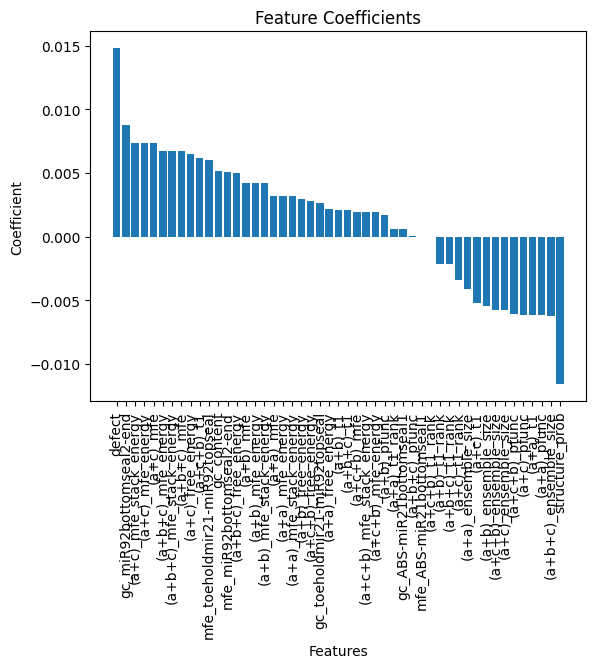

,Features,Coefficients,Absolute Coefficients
0,defect,0.014825,0.014825
48,structure_prob,-0.011613,0.011613
1,gc_miR92bottomseal2-end,0.008788,0.008788
2,(a+c)_mfe_stack_energy,0.007373,0.007373
4,(a+c)_mfe,0.007373,0.007373
3,(a+c)_mfe_energy,0.007373,0.007373
5,(a+b+c)_mfe_energy,0.006771,0.006771
6,(a+b+c)_mfe_stack_energy,0.006771,0.006771
7,(a+b+c)_mfe,0.006771,0.006771
8,(a+c)_free_energy,0.006465,0.006465


In [106]:
# on level
X = df_non_inf[params_all]
y = df_non_inf['on_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -2.0029871943088735
MSE: 0.0189878238047688
RMSE: 0.13779631274010493


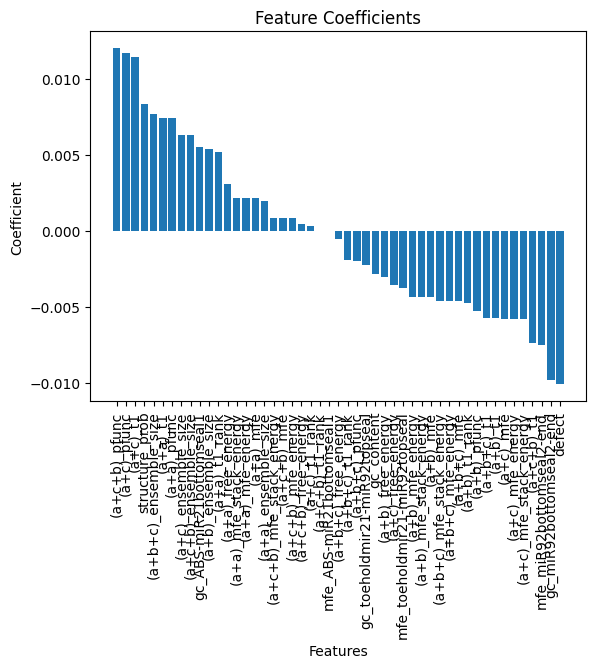

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_pfunc,0.012030,0.012030
1,(a+c)_pfunc,0.011743,0.011743
2,(a+c)_t1,0.011434,0.011434
48,defect,-0.010102,0.010102
47,gc_miR92bottomseal2-end,-0.009828,0.009828
3,structure_prob,0.008352,0.008352
4,(a+b+c)_ensemble_size,0.007669,0.007669
46,mfe_miR92bottomseal2-end,-0.007533,0.007533
5,(a+a)_t1,0.007442,0.007442
6,(a+a)_pfunc,0.007442,0.007442


In [107]:
# off level
X = df_non_inf[params_all]
y = df_non_inf['off_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.1945576385144172
MSE: 12.268993314025252
RMSE: 3.502712279652049


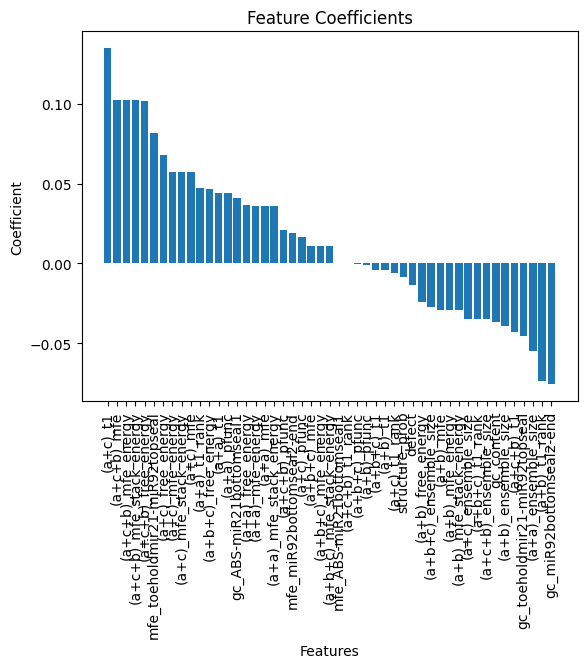

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.134755,0.134755
1,(a+c+b)_mfe,0.102610,0.102610
2,(a+c+b)_mfe_energy,0.102610,0.102610
3,(a+c+b)_mfe_stack_energy,0.102610,0.102610
4,(a+c+b)_free_energy,0.101730,0.101730
5,mfe_toeholdmir21-miR92topseal,0.081642,0.081642
48,gc_miR92bottomseal2-end,-0.075536,0.075536
47,(a+b)_t1_rank,-0.073269,0.073269
6,(a+c)_free_energy,0.067752,0.067752
8,(a+c)_mfe_stack_energy,0.057271,0.057271


In [108]:
# ON OFF ratio a-c-b
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_(a+c+b)']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.12114260638136054
MSE: 1.053805181067922
RMSE: 1.0265501356816051


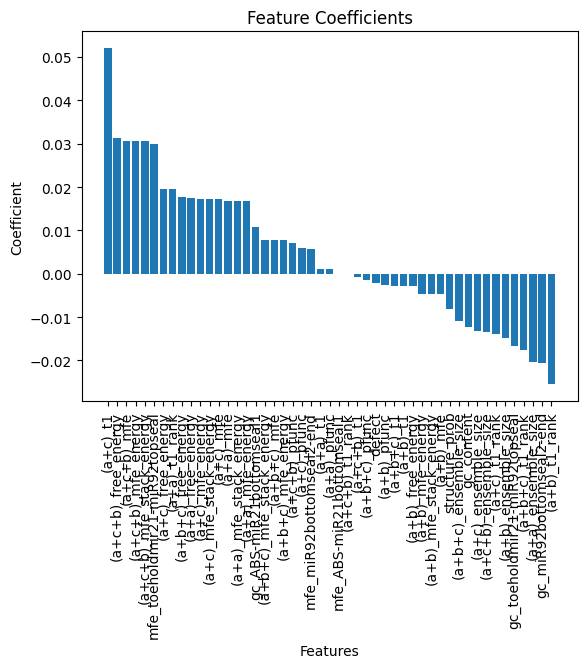

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.052041,0.052041
1,(a+c+b)_free_energy,0.031214,0.031214
2,(a+c+b)_mfe,0.030681,0.030681
3,(a+c+b)_mfe_energy,0.030681,0.030681
4,(a+c+b)_mfe_stack_energy,0.030681,0.030681
5,mfe_toeholdmir21-miR92topseal,0.029861,0.029861
48,(a+b)_t1_rank,-0.025466,0.025466
47,gc_miR92bottomseal2-end,-0.020668,0.020668
46,(a+a)_ensemble_size,-0.020243,0.020243
6,(a+c)_free_energy,0.019662,0.019662


In [109]:
# ON OFF ratio weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.11881909391830647
MSE: 0.0033328984134648604
RMSE: 0.05773126027954751


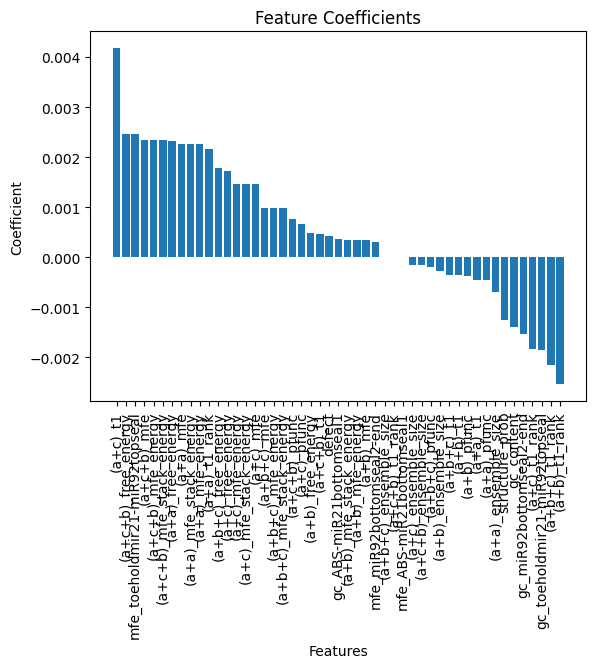

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.004177,0.004177
48,(a+b)_t1_rank,-0.002537,0.002537
1,(a+c+b)_free_energy,0.002459,0.002459
2,mfe_toeholdmir21-miR92topseal,0.002452,0.002452
3,(a+c+b)_mfe,0.002334,0.002334
5,(a+c+b)_mfe_stack_energy,0.002334,0.002334
4,(a+c+b)_mfe_energy,0.002334,0.002334
6,(a+a)_free_energy,0.002313,0.002313
7,(a+a)_mfe,0.002267,0.002267
8,(a+a)_mfe_stack_energy,0.002267,0.002267


In [110]:
# ON level weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_on_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.35266102233250596
MSE: 0.0022362914051937133
RMSE: 0.04728944285137766


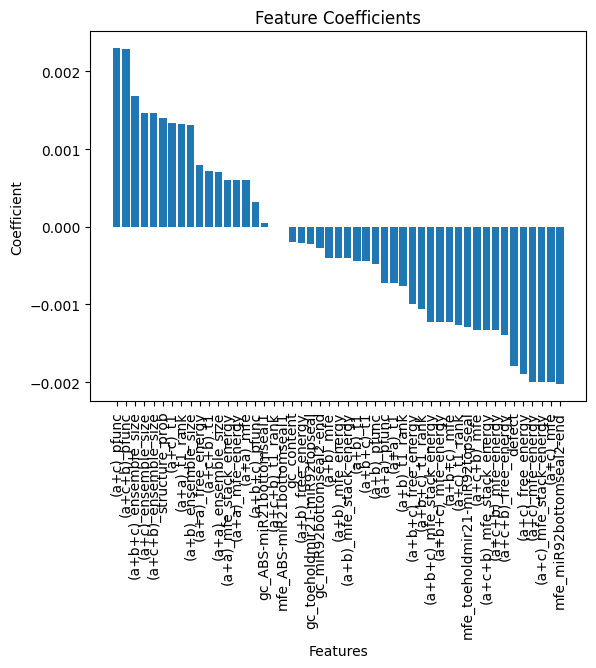

,Features,Coefficients,Absolute Coefficients
0,(a+c)_pfunc,0.002300,0.002300
1,(a+c+b)_pfunc,0.002292,0.002292
48,mfe_miR92bottomseal2-end,-0.002026,0.002026
47,(a+c)_mfe,-0.001995,0.001995
45,(a+c)_mfe_energy,-0.001995,0.001995
46,(a+c)_mfe_stack_energy,-0.001995,0.001995
44,(a+c)_free_energy,-0.001890,0.001890
43,defect,-0.001796,0.001796
2,(a+b+c)_ensemble_size,0.001678,0.001678
3,(a+c)_ensemble_size,0.001464,0.001464


In [111]:
# OFF level weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_off_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

In [ ]:
# on off ratio
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

# 4.0-EDA